Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 3)                12        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

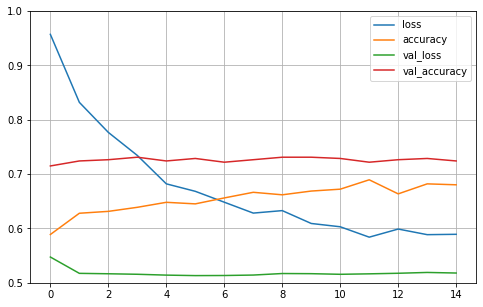

Test accuracy 0.716911792755127


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers
# import nni

class build_nn():
    def __init__(self, num_neuron, drop_out_rate):
        self.num_neuron = num_neuron
        self.drop_out_rate = drop_out_rate

    def __call__(self):
        m = keras.Sequential(
            [
                keras.Input(shape = 3),
                layers.BatchNormalization(),
                layers.Dense(self.num_neuron, activation = "selu", kernel_initializer = "lecun_normal"),
                layers.Dropout(self.drop_out_rate),
                layers.BatchNormalization(),
                layers.Dense(self.num_neuron, activation = "selu", kernel_initializer = "lecun_normal"),
                layers.Dropout(self.drop_out_rate),
                layers.Dense(1, activation = "sigmoid")
            ]
        )
        return m

def plot_history(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0.5, 1)
    plt.show()

def run_nn(paras, graph = False):
    d = pd.read_csv("https://raw.githubusercontent.com/maxleungtszchun/Statistical-Learning-with-customer-data/main/data/d.csv", na_values = "NA")
    train_d = d.sample(frac = 0.8, random_state = 5)
    test_d = d.drop(train_d.index)

    train_X = train_d[["negative_r_zScore.x", "f_zScore.x", "m_zScore.x"]]
    test_X = test_d[["negative_r_zScore.x", "f_zScore.x", "m_zScore.x"]]

    train_y = train_d["return.y"]
    test_y = test_d["return.y"]

    model = build_nn(num_neuron = paras["num_neuron"], drop_out_rate = paras["drop_out_rate"])()
    model.summary()
    model.compile(loss = "binary_crossentropy",
                  optimizer = keras.optimizers.Nadam(learning_rate = paras["learning_rate"]),
                  metrics = ["accuracy"])
    history = model.fit(train_X, train_y, batch_size = paras["batch_size"], epochs = 15, validation_split = 0.2)
    if graph == True: plot_history(history = history)
    loss, accuracy = model.evaluate(test_X, test_y, verbose = 0)
    print("Test accuracy %s" % accuracy)
    # nni.report_final_result(accuracy)

if __name__ == "__main__":
    # found by using nni
    paras = {
        "num_neuron": 64,
        "drop_out_rate": 0.6569358164629767,
        "learning_rate": 0.001,
        "batch_size": 32
    }
    # paras = nni.get_next_parameter()
    run_nn(paras = paras, graph = True)